# Education, Income, & Poverty in the U.S. and Relationship to Racial Makeup in U.S. Cities

### Capstone Project by: Michael J. Kessler

The topic of racially motivated police shootings in the US is current and contentious. Media coverage is notably biased toward narratives that support one of two conclusions. The first is the position that race is a significant contributor to the number of police shooting incidents, with particular focus on black Americans. The other narrative supported is that the racial effect is insignificant and that any rise in police shootings of black Americans is a result of crime rates in black neighborhoods. Of course there are variations along a spectrum between these positions. But these are the two narratives that receive the majority of the social dialogue. 

Clearly, either of these positions must be propped up on mountains of good data with clear, calculable hypotheses. It is vital to the national dialogue that conversations about the data be as dispassionate as possible and that the conclusions not be led by bias or presupposition. 

I intend to analyze data to answer the following questions:

1. Is there a correlation between Education Rates (high school) and Poverty Rates in U.S. states?
2. Similiary, is there a correlation between Education Rates (high school) and Median Income in U.S. States?
3. What is the relationship among these variables and concentrations of black Americans in U.S. cities and states?
    
The purpose of these questions is to support the null hypothesis that there is no racial bias that fatal police shooting incidents are not racially motivated and any disproportionate increase among African Americans is the result of other factors external to race. 

The dataset located on Kaggle entitled [‘Fatal Police Shootings in the US’](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us/data) contains five CSV files for 2015 information on US median household income, percentage of high school graduations, percentage of people living below the poverty level, police killings, and racial breakdowns of US cities, all within 2015. The statewide data is further broken down by city. 

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
income = pd.read_csv('MedianHouseholdIncome2015.csv', encoding='latin1')
poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding='latin1')
highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding='latin1')
killings = pd.read_csv('PoliceKillingsUS.csv', encoding='latin1')
race = pd.read_csv('ShareRaceByCity.csv', encoding='latin1')

In order to manage the data, I grouped all city data under their respective states, taking the means of the city data as the representative of the state with city data that is incomplete being dropped to prevent erroneous skewing. City data that lacks any value for income, poverty percentage, or high school grad rates are omitted for all three as well. Additionally, I've grouped the percentage of black populations in U.S. cities for the mean in their respective states. However, the problem of police killings is not necessarily statewide. If, for instance, I group all Illinois together, I might find that the concentration of black Americans and incidents of police killings go down considerably (as well as the statistical usefulness) compared to the same data just for Chicago. 

In [147]:
income['Median Income'] = pd.to_numeric(income['Median Income'], errors='coerce').dropna().astype(np.int64)
income_state = income.groupby(['Geographic Area'])[['Median Income']].mean()
poverty['poverty_rate'] = pd.to_numeric(poverty['poverty_rate'], errors='coerce').fillna(0).astype(float)
poverty_state = poverty.groupby(['Geographic Area'])[['poverty_rate']].mean()
highSchool['percent_completed_hs'] = pd.to_numeric(highSchool['percent_completed_hs'], errors='coerce').fillna(0).astype(float)
highSchool_state = highSchool.groupby(['Geographic Area'])[['percent_completed_hs']].mean()
race['share_black'] = pd.to_numeric(race['share_black'], errors='coerce').fillna(0).astype(float)
race_state_black = race.groupby(['Geographic area'])[['share_black']].mean()

In [148]:
income_state.describe()

,Median Income
count,51.000000
mean,51937.305444
std,11288.986864
min,35002.099125
25%,42899.002128
50%,49811.306215
75%,59765.825500
max,80584.406367


In [149]:
poverty_state.describe()

,poverty_rate
count,51.000000
mean,16.120463
std,4.533395
min,8.160917
25%,12.607819
50%,15.499853
75%,19.803889
max,26.884254


In [150]:
highSchool_state.describe()

,percent_completed_hs
count,51.000000
mean,85.851474
std,4.505518
min,74.086949
25%,82.179660
50%,87.596259
75%,89.493987
max,92.028455


The income information for Arizona, for example, is calculated using the median household income for its 372 cities, resulting in a mean income of $42,495.67:

In [151]:
income.loc[income['Geographic Area'] == 'AZ'].describe()

,Median Income
count,372.000000
mean,42495.666667
std,19503.296251
min,4511.000000
25%,30055.500000
50%,39000.000000
75%,49930.000000
max,151184.000000


Note the use of Median Income for the cities as the measure of central tendency. Though the mean is often a better measure, this eliminates skewing due to outliers. However, the central tendency of the states is measured using mean of the medians. The distribution of these incomes for Arizona follows the same right-skewed distribution as that of the national data:

Text(0,0.5,'Number of US States')

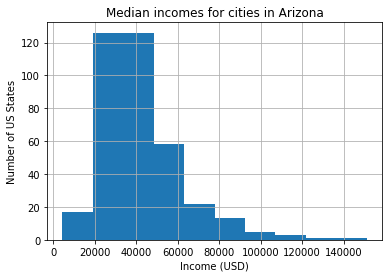

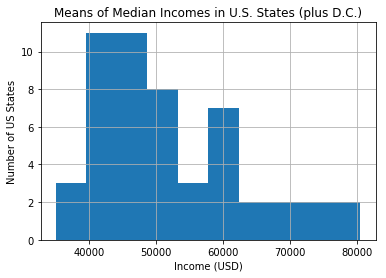

In [152]:
income_az = income.loc[income['Geographic Area'] == 'AZ']
pd.DataFrame.hist(income_az, bins=10)
plt.title('Median incomes for cities in Arizona')
plt.xlabel('Income (USD)')
plt.ylabel('Number of US States')
pd.DataFrame.hist(income_state, bins=10)
plt.title('Means of Median Incomes in U.S. States (plus D.C.)')
plt.xlabel('Income (USD)')
plt.ylabel('Number of US States')

The first problem with the data I found is that no matter how complete the data is for each locale and what statistical correlations may exist, this is only data for a single year, 2015. Without previous year data to compare, any correlations cannot be shown to reflect any trends. Accordingly, I decided to move my focus away from the data on police shootings until I had processed and analyzed the raw demographic data as it pertains to education, income, and poverty. To start, I wanted to see if there appears to be a correlation between high school graduation rates, income, and poverty. It seems intuitive that they are related. But again, given the politically charged nature of the subject verification of what is presumed true seems appropriate.  
    
Additionally, one might wonder why, if statistical relationships between race and police shootings are the focus, why all the demographic data on wealth and education to begin with. The answer rests in the alternate opinion that high crime rates in certain areas are the cause of increased police shootings and that these areas can be identified by low education and income as well as high percentages of the population living below the poverty line and that cities with higher concentrations of black Americans possess a higher incident rate of these variables. So it is this relationship that I’ll investigate first. 
    
To calculate the strength of a linear relationship between two variables, we use the sample correlation coefficient, or a Pearson’s r. Its range is -1 ≤ r ≤ +1. The closer r is to 0 the less of a linear relationship exists between x and y. Near +1 we can say that there is a strong positive relationship, while a value closer to -1 indicates a strong negative relationship. Using the mean poverty rates, graduation rates, and mean of median incomes for each state, plus Washington D.C. we have 51 data points to work with. Statisticians often determine this by calculating the coefficient for high school graduation rates and poverty. 

In [153]:
income_highSchool_state = pd.concat([income_state['Median Income'], highSchool_state['percent_completed_hs']], axis=1, keys=['income_state', 'highSchoolState'])
income_highSchool_state.corr(method='pearson')

,income_state,highSchoolState
income_state,1.000000,0.561194
highSchoolState,0.561194,1.000000


Accordingly, we see that income and high school graduation rates have an above average positive relationship of 0.562528. Of course, another quick way to assess the relationship of these variables is a simple scatter plot analysis. 

[]

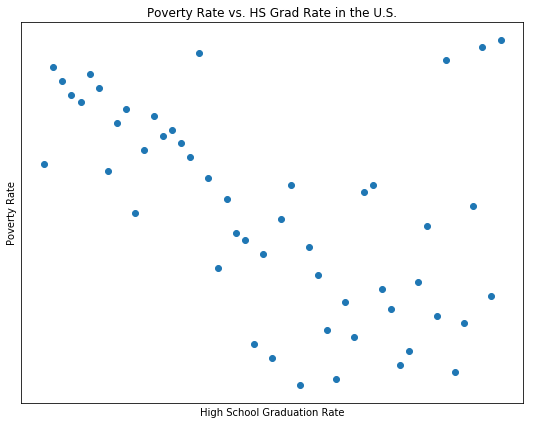

In [154]:
fig = plt.figure(figsize=(9,7))
plt.scatter(highSchool_state, poverty_state, s=None)
plt.title('Poverty Rate vs. HS Grad Rate in the U.S.')
plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

Here we can see a clearly strong, negative linear relationship between the two variables, this time using high school graduation rates and percentage of population below the poverty level. This means that as high school graduation rates increase, poverty decreases. An unsurprising result, as is the strong positive linear relationship between high school graduation and income, albeit somewhat weaker than the former relationship as might be expected in a capitalist job market. 

Accordingly, we can answer both our first and second questions and affirm that there is a moderate to strong correlation among these variables. 

[]

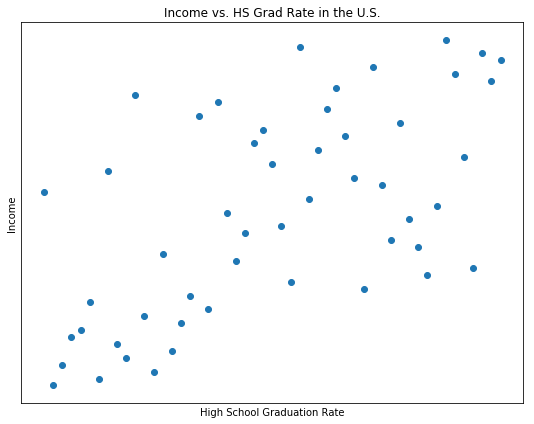

In [155]:
fig = plt.figure(figsize=(9,7))
plt.scatter(highSchool_state, income_state, s=None)
plt.title('Income vs. HS Grad Rate in the U.S.')
plt.xlabel("High School Graduation Rate")
plt.ylabel("Income")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

The next question to be asked is whether or not the racial makeup of areas most affected by low education, low income, and higher poverty levels as is consistent with the media narrative. If true, however, the next step is not to start analyzing police shootings in these areas until we can establish that these regions also possess higher crime rates that would call for increased police presence. If an area is being policed more, then increases in police activity is to be expected and the per-capita rates of police shootings may be entirely consistent. This will be the focus of further research. 

So now that the correlations among income, education, and poverty has been established, we should assess the relationship between these variables and the racial makeup of states. However, a quick look at the racial makeup data reveals a big problem. The sum of each city's racial percentages (white, hispanic, black, asian, & native American) exceeds 100% over 56% of the time, and in many cities equals 200% (100% white & 100% hispanic). This is likely a result of the common practice of surveying race with an intermediate choice between white and hispanic, "white but of Hispanic descent". Even federal guidelines define "Hispanic" not as a race, but as an ethnicity [according to Pew Research](http://www.pewresearch.org/fact-tank/2015/06/15/is-being-hispanic-a-matter-of-race-ethnicity-or-both/). 

However, this needn't invalidate the racial data for our purposes. The hypothesis being tested is whether black communities suffer a disproportionately higher amount of police killings. So we really only need to test the relationships among our established coorelations (education, income, & poverty) with concentrations of blacks across US cities, then test the relationsip between cities with higher police killinng incidents versus city and state concentrations of black Americans.

The datasets provided do not provide overall populations of U.S cities. So I have obtained a [new dataset](https://www.kaggle.com/zbi441/us-metropolitan-population-density-2016/data) of city population estimates for 2016. The population differences between 2015 and 2016 are expected to be negligible and pose no problems when comparing the data. From the population dataset I will create a new DataFrame for the top 100 most populous cities and add in the black population percentages and percentages living below the poverty line for comparison. 

In [156]:
import scipy

In [157]:
population = pd.read_csv('city_stat_2.csv', encoding='latin1')

In [158]:
population.head(20)

,2016_rank,city,State,2016_estimate,2010_Census,Change,2016_land area,population_density,Location (longitude),location(latitude)
0,1,New York,New York,"8,537,673","8,175,133",4.43%,301.5 sq mi,28317.0,40.66,73.94
1,2,Los Angeles,California,"3,976,322","3,792,621",4.84%,468.7 sq mi,8484.0,34.02,118.41
2,3,Chicago,Illinois,"2,704,958","2,695,598",0.35%,227.3 sq mi,11900.0,41.84,87.68
3,4,Houston,Texas,"2,303,482","2,100,263",9.68%,637.5 sq mi,3613.0,29.79,95.39
4,5,Phoenix,Arizona,"1,615,017","1,445,632",11.72%,517.6 sq mi,3120.0,33.57,112.09
5,6,Philadelphia,Pennsylvania,"1,567,872","1,526,006",2.74%,134.2 sq mi,11683.0,40.01,75.13
6,7,San Antonio,Texas,"1,492,510","1,327,407",12.44%,461.0 sq mi,3238.0,29.47,98.53
7,8,San Diego,California,"1,406,630","1,307,402",7.59%,325.2 sq mi,4325.0,32.82,117.14
8,9,Dallas,Texas,"1,317,929","1,197,816",10.03%,340.9 sq mi,3866.0,32.79,96.77
9,10,San Jose,California,"1,025,350","945,942",8.39%,177.5 sq mi,5777.0,37.30,121.82


Using this dataset for 2016 population data I was able to create a new CSV matching the 100 most populous US cities with their respective black population percentages. 

In [159]:
pop_top100_withBlack = pd.read_csv('uspopulation_top100_w_black.csv', encoding='latin1')

In [160]:
pop_top100_withBlack.head(10)

,2016_rank,city,State,2016_estimate,share_black
0,1,New York,New York,"8,537,673",25.5
1,2,Los Angeles,California,"3,976,322",9.6
2,3,Chicago,Illinois,"2,704,958",32.9
3,4,Houston,Texas,"2,303,482",23.7
4,5,Phoenix,Arizona,"1,615,017",6.5
5,6,Philadelphia,Pennsylvania,"1,567,872",46.9
6,7,San Antonio,Texas,"1,492,510",6.9
7,8,San Diego,California,"1,406,630",6.7
8,9,Dallas,Texas,"1,317,929",25.0
9,10,San Jose,California,"1,025,350",3.2


To this DataFrame I added the poverty rates of their respective cities. 

In [161]:
poverty_rate = [20.6,22.1,22.3,22.5,23.1,26.4,19.8,15.4,24,11.3,18,17.7,13.2,21.7,21.3,18.8,16.8,13.5,17.3,20.9,18,21.5,40.3,18.2,27.6,18,18.3,17.5,16.4,23.7,28.7,19.2,25.3,29.8,22,16.5,19,24.6,20.6,13.4,16,28.3,8.3,16.7,20.4,21.9,20.2,17.5,27,17.3,36.2,21.8,19.8,15.3,12,16.5,22.1,17.5,18.8,18.9,27.1,25.3,22.9,22.3,30.5,8.2,9.8,19.3,7.5,29.7,15.9,27.8,20.2,12.5,12.3,19,19.3,19.2,17.2,30.8,30.8,19,20.7,10,9.5,21.7,18.3,21,24.8,16.6,15.1,9.7,6.6,27.1,17.2,6.1,25.6,25.5,14.3,33.4]
pop_top100_withBlack['poverty_rate'] = poverty_rate

In [162]:
pop_top100_withBlack.head(10)

,2016_rank,city,State,2016_estimate,share_black,poverty_rate
0,1,New York,New York,"8,537,673",25.5,20.6
1,2,Los Angeles,California,"3,976,322",9.6,22.1
2,3,Chicago,Illinois,"2,704,958",32.9,22.3
3,4,Houston,Texas,"2,303,482",23.7,22.5
4,5,Phoenix,Arizona,"1,615,017",6.5,23.1
5,6,Philadelphia,Pennsylvania,"1,567,872",46.9,26.4
6,7,San Antonio,Texas,"1,492,510",6.9,19.8
7,8,San Diego,California,"1,406,630",6.7,15.4
8,9,Dallas,Texas,"1,317,929",25.0,24.0
9,10,San Jose,California,"1,025,350",3.2,11.3


Visually we can see (as charted below) that there does not seem to be a very strong relationship between cities having high concentrations of African American residents and the poverty level of the city. Note that three of the lowest povery levels are San Jose, San Francisco, and Seattle. These are hubs of the tech industry (and others) and could be considered outliers in any consideration of cities affected by poverty. 

However, we can't look at a single chart of high-black-concentration cities and determine the relationship with poverty statistically. So we'll perform a student's t-test to assess support for our null hypothesis as well. 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


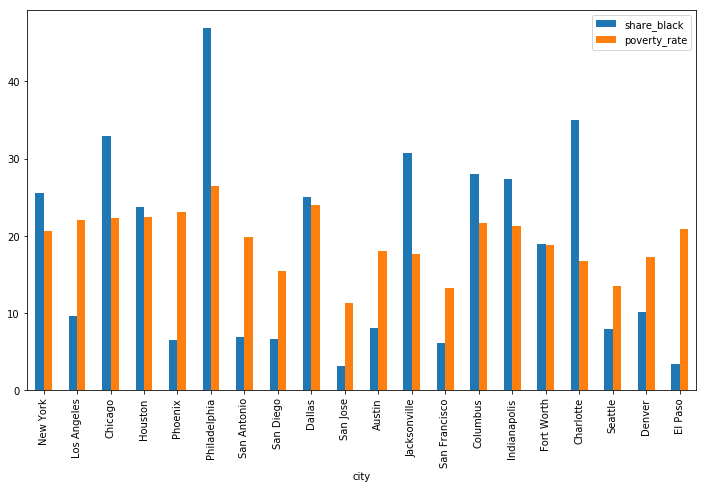

In [163]:
pop_top100_withBlack[:20].plot(x='city', y=['share_black','poverty_rate'], kind='bar', figsize=(12,7))

In [164]:
a = pop_top100_withBlack['share_black']
b = pop_top100_withBlack['poverty_rate']
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=0.401017644513029, pvalue=0.6888395539543847)

This p-value being 0.6888 tells us that there is no significant support for rejecting the null hypothesis that there is no relationship between black population concentrations and poverty. The null hypothesis is not rejected. We back up this test with another Pearson's correlation. 

In [165]:
pop_top100_withBlack[['share_black','poverty_rate']].corr(method='pearson')

,share_black,poverty_rate
share_black,1.00000,0.56943
poverty_rate,0.56943,1.00000


At this point, we have no reason to reject the null hypothesis. But the data analysis has only begun. Further research must include similar comparisons of cities with low black populations, mulitple years of data on population demographics a well as a thorough analysis of fatal police incidents, accounting for a number of variables such as victim behavior prior, the threat to and perceived by the officer, the nature of the call that brought police presence, and several othes including, yes... race. Accordingly, follow up research should include horizontal data analysis of the same correlations and relationships analyzed here for other races and within areas with low black populations, but of moderate to large populations. Then vertical data analysis of the police shootings data should be evaluated as they relate to racial bias only when other demographic factors ahve been considered and tested for their impact. 